# Problem Description:
A Human Resource company needs to determine the salary for a new job position being created. They only have access to a salary dataset for the company, which includes salary information for the top 10 positions along with their corresponding levels. The task is to assist HR in deciding the appropriate salary if the new position falls between levels 7 and 8.

Data Set: **Position_Salaries.csv**
Rules: You are restricted from utilizing the sklearn library.You are limited to using only the libraries provided.

Reference : https://www.javatpoint.com/machine-learning-polynomial-regression

 https://www.kaggle.com/code/omkarsantoshraut/polynomial-regression

In [ ]:
# Allowded to use only these libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exploratory data analysis

In [ ]:
# your code(s)
df = pd.read_csv('/content/Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


### Based on the exploratory data analysis, answer the following


* Can you use a simple linear regression model to fit this data (Yes/No)?
> * No
* If you use a simple linear model to fit this data, will it fit well (Yes/No)?
> * No
* Explain why you said yes or no to the above questions.
> * Because a simple linear regression model would not fit the data well due to the non-linear relationship between the independent variable Level and the dependent variable Salary




## Polynomial Regression

**Construct a second order Model:** $$\;\;\;\;
\hat y = w_1 x_1^2 + w_2x_1 + b
$$

**Construct a Cost function:**
$$MSE(w_1,w_2,b)=  \frac{1}{n} \sum_{i=1}^{n} \left( (w_1x_{1i}^2 + w_2x_{1i} + b) - y_i \right)^2 $$


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


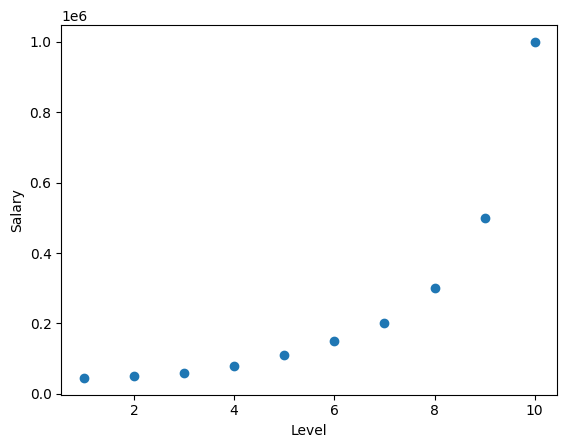

In [ ]:
# your code to plot the cost function (if required)
x = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values
print(x, y)
plt.scatter(x, y)
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

### By analysing the cost function, answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> * yes
* Explain why you said yes or no to the above questions.
> * The MSE is a commonly used cost function in regression problems, including polynomial regression.So we can use Mean Squared Error as cost function for polynomial regression. It measures the average squared difference between the predicted and actual values of the dependent variable. By minimizing the MSE, we aim to find the optimal values of the model parameters that result in the best fit to the data.

**Derivatives of cost function:**
The MSE cost function is
$$ MSE(w_1, w_2, b) = \frac{1}{n} \sum_{i=1}^{n} \left( (w_1x_{1i}^2 + w_2x_{1i} + b) - y_i \right)^2 $$
find the partial derivative of MSE with respect to w1,w2 and b
Let
$$ \hat{y}_i = w_1 x_{1i}^2 + w_2 x_{1i} + b $$
and
$$ \delta=\hat{y}_i - y_i $$


*   Partial derivative with respect to w1:$$ \frac{\partial MSE}{\partial w_1} = \frac{2}{n} \sum_{i=1}^{n} x_{1i}^2 \cdot \delta $$


*    Partial derivative with respect to w2:$$ \frac{\partial MSE}{\partial w_2} = \frac{2}{n} \sum_{i=1}^{n} x_{1i} \cdot \delta $$

*   Partial derivative with respect to b:$$ \frac{\partial MSE}{\partial b} = \frac{2}{n} \sum_{i=1}^{n} \delta $$




**Gradient Descent Algorithm:**
```
Repeat until converges:
```
$$your\;answer$$

## Implementation of the model

In [ ]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

#importing datasets
data_set= pd.read_csv('Position_Salaries.csv')

#Extracting Independent and dependent Variable
x= data_set.iloc[:, 1:2].values
y= data_set.iloc[:, 2].values

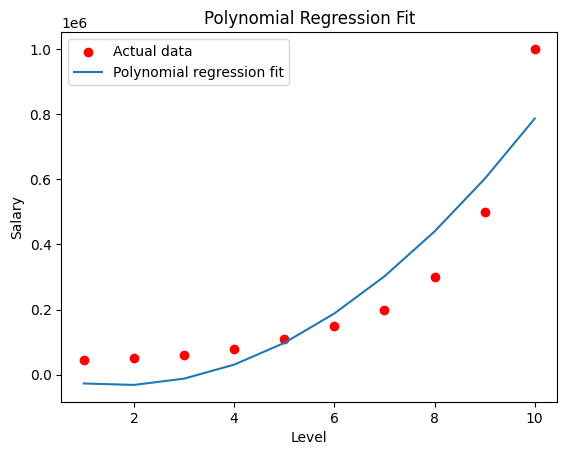

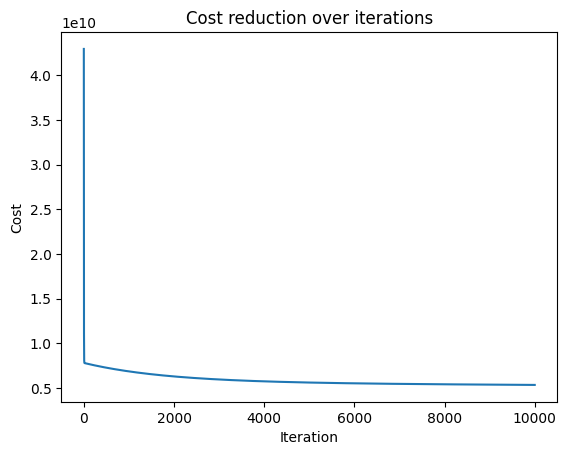

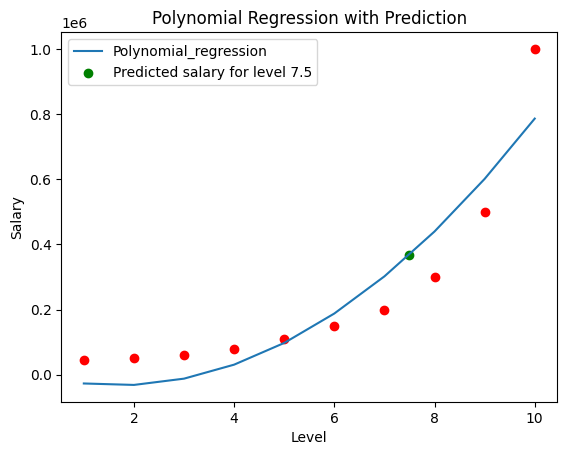

Predicted Salary for level 7.5: $367,915.23


In [80]:

# Polynomial Regression Model Function
def poly_regression(x, coefficients):
    #Calculates y_predict = b + w1*x + w2*x^2
    y_predict = np.dot(x, coefficients)
    return y_predict

# Cost Function - Mean Squared Error
def cost(X, y, coefficients):
    #Computes the mean squared error cost
    n = len(y)
    y_predict = polynomial_regression(X, coefficients)
    cost = (1/(2*n)) * np.sum((y_predict - y) ** 2)
    return cost

# Derivative of Cost Function
def derivatives(X, y, coefficients):
    #Computes the derivatives of the MSE cost function
    n = len(y)
    y_predict = polynomial_regression(X, coefficients)
    d_coefficients = (1/n) * np.dot(X.T, (y_predict - y))
    return d_coefficients

# Gradient Descent Function to Minimize the Cost Function
def gradient_descent(X, y, coefficients, learning_rate, iterations):
   # Performs gradient descent to learn coefficients """
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        coefficients -= learning_rate * derivatives(X, y, coefficients)
        cost_history[i] = compute_cost(X, y, coefficients)
    return coefficients, cost_history

# Load the dataset
df = pd.read_csv('/content/Position_Salaries.csv')
X = df['Level'].values.reshape(-1, 1)
y = df['Salary'].values

# Prepare polynomial features: x, x^2
X_poly = np.hstack((np.ones((X.shape[0], 1)), X, X**2))
# Initial coefficients (b, w1, w2)
coefficients = np.zeros(3)
learning_rate = 0.0001
iterations = 10000

# Run gradient descent
coefficients, cost_history = gradient_descent(X_poly, y, coefficients, learning_rate, iterations)

# Predicting using optimized coefficients
y_predict = poly_regression(X_poly, coefficients)
# Plot polynomial model
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X, y_predict, label='Polynomial regression fit')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

# Plot iteration vs cost
plt.plot(range(iterations), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost reduction over iterations')
plt.show()
# New level prediction
level_new = 7.5
new_X = np.array([1, level_new, level_new**2]).reshape(1, -1)
predicted_salary = polynomial_regression(new_X, coefficients)

# Plot with the new prediction
plt.scatter(X, y, color='red')
plt.plot(X, y_predict, label='Polynomial_regression')
plt.scatter([level_new], [predicted_salary], color='green', label=f'Predicted salary for level {level_new}')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression with Prediction')
plt.legend()
plt.show()

print(f"Predicted Salary for level {level_new}: ${predicted_salary[0]:,.2f}")


### Answer the following

* What is learning rate?
> *
The learning rate, found in optimization algorithms such as gradient descent, dictates the magnitude of parameter updates, balancing the trade-off between how quickly the model converges and its stability.
* What will happen if the learning rate is too large?
> * A too-large learning rate can cause unstable updates, leading to overshooting or failure to converge. This results in oscillations or divergence, potentially preventing the algorithm from reaching the optimal solution and even causing it to bounce around or diverge to infinity.
* What will happen if the learning rate is too small?
> * A too-small learning rate slows down convergence, prolonging training. It may also cause the algorithm to get stuck in local minima or saddle points, hindering reaching the optimal solution.



* If you what to change the second order (quadratic) model to third order model what all things will change in the above code?
> * Model Function:
The third-order polynomial model can be expressed as:$\hat{y} = w_1 x^3 + w_2 x^2 + w_3 x + b$



> * Cost Function:
The Mean Squared Error (MSE) cost function remains the same as before:
$MSE(w_1, w_2, w_3, b) = \frac{1}{n} \sum_{i=1}^{n} ((w_1 x_i^3 + w_2 x_i^2 + w_3 x_i + b) - y_i)^2$


> Derivatives of Cost Function:
The partial derivatives with respect to
w1,w2,w3 and b are:
$\frac{\partial MSE}{\partial w_1} = \frac{2}{n} \sum_{i=1}^{n} x_i^3 \cdot \delta$

$\frac{\partial MSE}{\partial w_2} = \frac{2}{n} \sum_{i=1}^{n} x_i^2 \cdot \delta$

$\frac{\partial MSE}{\partial w_3} = \frac{2}{n} \sum_{i=1}^{n} x_i \cdot \delta$

$\frac{\partial MSE}{\partial b} = \frac{2}{n} \sum_{i=1}^{n} \delta$


> *Gradient Descent Algorithm:
Repeat until convergence:
$w_1 := w_1 - \alpha \cdot \frac{\partial MSE}{\partial w_1}$

$w_2 := w_2 - \alpha \cdot \frac{\partial MSE}{\partial w_2}$

$w_3 := w_3 - \alpha \cdot \frac{\partial MSE}{\partial w_3}$

$b := b - \alpha \cdot \frac{\partial MSE}{\partial b}$

